# MalmöMilen start group distribution

The registration form ask participants to estimate their time in order to create groups.

Here is a visualization of the number of people per start group.

In [1]:
from bs4 import BeautifulSoup
import requests
import json

url = 'http://www.malmomilen.se/anmaelan/startlista-2014'
page = requests.get(url)
soup = BeautifulSoup(page.text)
table = soup.body.table.find_all('tr')

ps = {}
for line in table:
    c = line.find_all('td')
    time = c[4].text if c[4].text != '' else 'N/A'
    if time not in ps:
        ps[time] = 0
    ps[time] += 1

print("There are " + str(len(table)) + " participants")

AttributeError: 'NoneType' object has no attribute 'find_all'

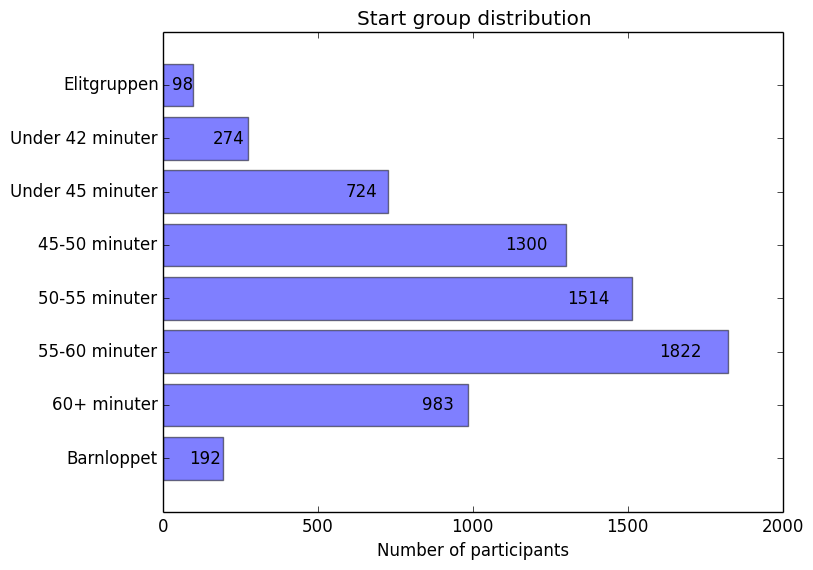

In [3]:
% matplotlib inline

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

sorted_groups = ['Elitgruppen', 'Under 42 minuter', 'Under 45 minuter', '45-50 minuter', 
                 '50-55 minuter', '55-60 minuter', '60+ minuter', 'Barnloppet']
groups = [g[:8] for g in sorted_groups]
y_pos = np.arange(len(groups))[::-1]
n = [ps[group] for group in groups]

rects = plt.barh(y_pos, n, align='center', alpha=0.5)
plt.yticks(y_pos, sorted_groups)
plt.xlabel('Number of participants')
plt.title('Start group distribution')

for i, rect in enumerate(rects):
    plt.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, ps[groups[i]], ha='right', va='center')

plt.show()